### MS AAI 500 Final Project Week 5 Data Processing

In [1]:
import data_fix as dfix
import data_utils_g1 as du
import matplotlib.pyplot as plt
dfix.init()
data = dfix.scrub_txt_file()

Replacing all special characters for clean read
Asking for cleaned data file save location
Printing save location:
/Users/Arcpolar/Documents/GitHub/2022-msaai-500-final-project/data/blutest1.txt
/Users/Arcpolar/Documents/GitHub/2022-msaai-500-final-project/data/blutest1_final.csv


In [2]:
data

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3,,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,Turbo,300000,4,Manual,Rear,2-3,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,SONATA,2011,Sedan,Yes,Petrol,2.4,,161600,4,Tiptronic,Front,4-5,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,TUCSON,2010,Jeep,Yes,Diesel,2,,116365,4,Automatic,Front,4-5,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,CAPTIVA,2007,Jeep,Yes,Diesel,2,,51258,4,Automatic,Front,4-5,Left wheel,Black,4


In [3]:
print(data.Category.unique())

['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


In [135]:
data_types = {}
data_types['Price'] = 'int32'
data = data.astype(data_types)
categoryarray = data.Category.unique()
pricemeanarray = []
pricesdarray = []
df2 = data.query("Category == 'Jeep'")
price = df2['Price']
for x in categoryarray:
    comm = "Category == '"+x+"'"
    df2 = data.query(comm)
    price = df2['Price']
    mean = price.mean()
    sd = price.std()
    pricemeanarray.append(round(mean,2))
    pricesdarray.append(round(sd,2))
print(pricemeanarray)
print(pricesdarray)
print(categoryarray)

[23684.29, 11381.25, 14231.55, 18550.93, 122916.18, 25253.7, 21250.41, 20531.22, 24583.69, 11534.45, 28805.27]
[25314.28, 9076.91, 14372.43, 13638.08, 1722822.9, 47756.68, 28625.94, 13804.82, 22604.55, 12487.62, 28789.08]
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


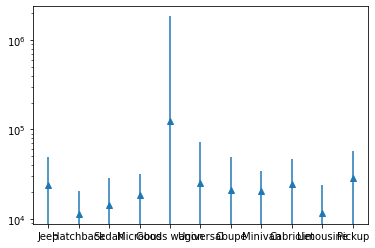

In [125]:
fig, ax = plt.subplots()
ax.errorbar(categoryarray, pricemeanarray, pricesdarray, linestyle='None', marker='^')
ax.set_yscale('log')
#ax.scatter(categoryarray,pricemeanarray)

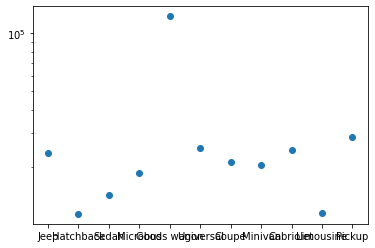

In [96]:
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarray)
ax.set_yscale('log')

[ 1  9  2  3  7  6  0  8  5 10  4]


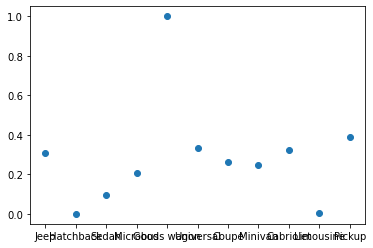

In [136]:
import numpy as np
pricemeansortarray = np.argsort(pricemeanarray)
print(pricemeansortarray)
pricemeanarrayln = np.log(pricemeanarray)
minimean = pricemeanarrayln.min()
unitstep = (pricemeanarrayln.max()-pricemeanarrayln.min())/1000
pricemeanarraynormal = (pricemeanarrayln - minimean)/unitstep/1000
#pricemeansortarray = pricemeanarray.sort()
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarraynormal)

In [119]:
j = len(categoryarray)
i = 0
for i in range(j):
    print(categoryarray[i], "normallization number is ", pricemeanarraynormal[i])
    i = i+1

Jeep normallization number is  0.3079780599792654
Hatchback normallization number is  0.0
Sedan normallization number is  0.09392340493746233
Microbus normallization number is  0.2053143059216948
Goods wagon normallization number is  1.0
Universal normallization number is  0.33494160951177987
Coupe normallization number is  0.26240791630064475
Minivan normallization number is  0.2479389006787977
Cabriolet normallization number is  0.32364130913667355
Limousine normallization number is  0.005619141052235945
Pickup normallization number is  0.3902405040526792


### MS AAI 500 Final Project Week 7 Data Processing

In [4]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import data_utils_g1 as du
plt.style.use('seaborn')

path = du.open_file_general()
# Reading the dataset
data = pd.read_csv(path)
print("The shape of the dataframe is: ", data.shape)

The shape of the dataframe is:  (19237, 18)


In [5]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4


In [6]:
outlier_free_list=0
filtered_data=0

# Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
 
 

removeOutliers(data, 'Price')

 
  
# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)

IQR value for column Price is: 16744.0
Shape of data after outlier removal is:  (18164, 18)


In [7]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4


In [8]:
data_types = {}
data_types['Price'] = 'int32'
data = data.astype(data_types)
categoryarray = data.Category.unique()
pricemeanarray = []
pricesdarray = []
df2 = data.query("Category == 'Jeep'")
price = df2['Price']
for x in categoryarray:
    comm = "Category == '"+x+"'"
    df2 = data.query(comm)
    price = df2['Price']
    mean = price.mean()
    sd = price.std()
    pricemeanarray.append(round(mean,2))
    pricesdarray.append(round(sd,2))
print(pricemeanarray)
print(pricesdarray)
print(categoryarray)

[17257.29, 11056.23, 12459.91, 16955.1, 9647.1, 20582.4, 14629.75, 19507.76, 16260.77, 11534.45, 17192.0]
[14110.05, 8164.43, 9770.7, 9839.18, 5531.82, 14065.25, 11003.49, 11586.49, 11959.79, 12487.62, 13627.2]
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


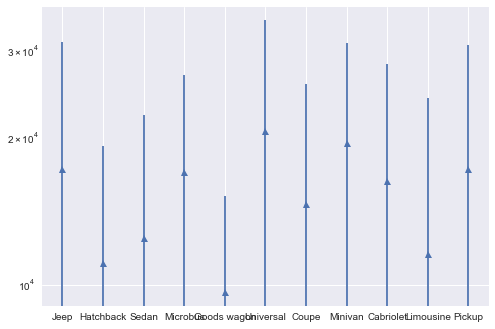

In [9]:
fig, ax = plt.subplots()
ax.errorbar(categoryarray, pricemeanarray, pricesdarray, linestyle='None', marker='^')
ax.set_yscale('log')

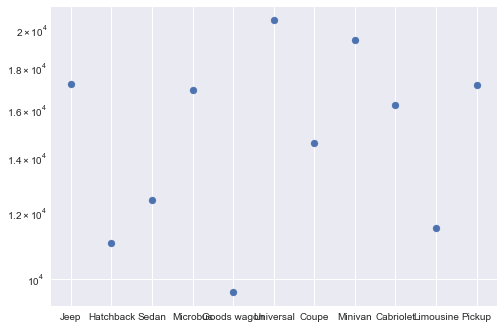

In [10]:
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarray)
ax.set_yscale('log')

[ 4  1  9  2  6  8  3 10  0  7  5]


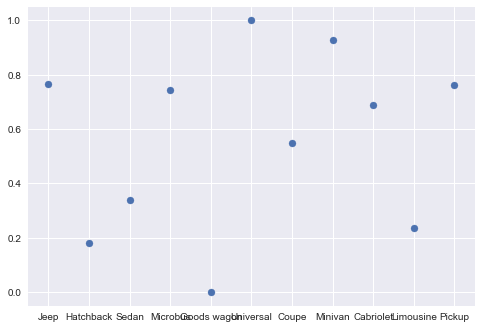

In [11]:
import numpy as np
pricemeansortarray = np.argsort(pricemeanarray)
print(pricemeansortarray)
pricemeanarrayln = np.log(pricemeanarray)
minimean = pricemeanarrayln.min()
unitstep = (pricemeanarrayln.max()-pricemeanarrayln.min())/1000
pricemeanarraynormal = (pricemeanarrayln - minimean)/unitstep/1000
#pricemeansortarray = pricemeanarray.sort()
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarraynormal)

In [12]:
j = len(categoryarray)
i = 0
for i in range(j):
    print(categoryarray[i], "normallization number is ", pricemeanarraynormal[i])
    i = i+1

Jeep normallization number is  0.7674761623186733
Hatchback normallization number is  0.17991620222618337
Sedan normallization number is  0.3376432200797243
Microbus normallization number is  0.7441633103982037
Goods wagon normallization number is  0.0
Universal normallization number is  1.0
Coupe normallization number is  0.5495002901338949
Minivan normallization number is  0.9292352951334608
Cabriolet normallization number is  0.6889846690983183
Limousine normallization number is  0.23579547587283772
Pickup normallization number is  0.7624740395219541


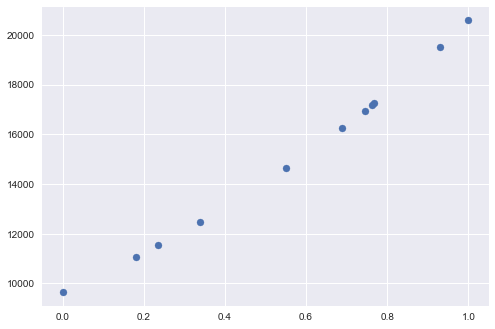

In [13]:
#pricemeansortarray = pricemeanarray.sort()
fig, ax = plt.subplots()
ax.scatter(pricemeanarraynormal, pricemeanarray)